In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from io import BytesIO

import matplotlib as plt
import requests
from PIL import Image

from albef_gradcam import load_model, test_transform, clean_caption, cross_attention_gradcam, visual_attention_gradcam
from tools import visualize, plt_grid

plt.rcParams['figure.facecolor'] = 'white'
device = 'cpu'
blocks = range(6, 12)

## Cross attention layers

In [3]:
model = load_model(device)

for i in blocks:
    model.text_encoder.base_model.base_model.encoder.layer[i].crossattention.self.save_attention = True

In [4]:
# some test image
response = requests.get('https://farm6.staticflickr.com/5482/9544061327_f675900fa2_z.jpg')
image = Image.open(BytesIO(response.content)).convert('RGB')

text = ['flower']
image_input = test_transform(384)(image).unsqueeze(0).to(device)
text_input = model.tokenizer(clean_caption(text), adding='max_length', truncation=True,
                             max_length=30, padding=True, return_tensors="pt").to(device)

In [5]:
gradcam = cross_attention_gradcam(model, image_input, text_input, average_heads=True,  blks=blocks)
print(gradcam.shape) # Shape: (block, heads, 24, 24) if average_heads=False else (blocks, 24, 24)

(6, 24, 24)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


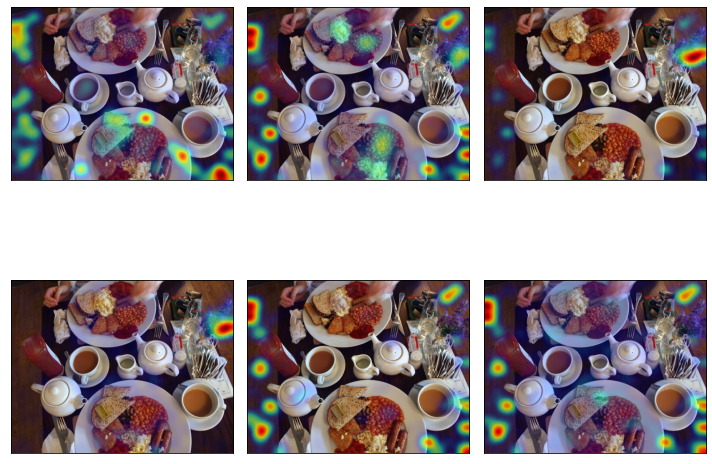

In [6]:
plt_grid([visualize(image, gradcam[i], show=False) for i in range(len(blocks))])

## Visual layers only

In [7]:
for i in blocks:
    model.text_encoder.base_model.base_model.encoder.layer[i].crossattention.self.save_attention = False

In [8]:
gradcam = visual_attention_gradcam(model, image_input, text_input, average_heads=True, block_id=11)
print(gradcam.shape) # Shape: (block, heads, 24, 24) if average_heads=False else (blocks, 24, 24)

(24, 24)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


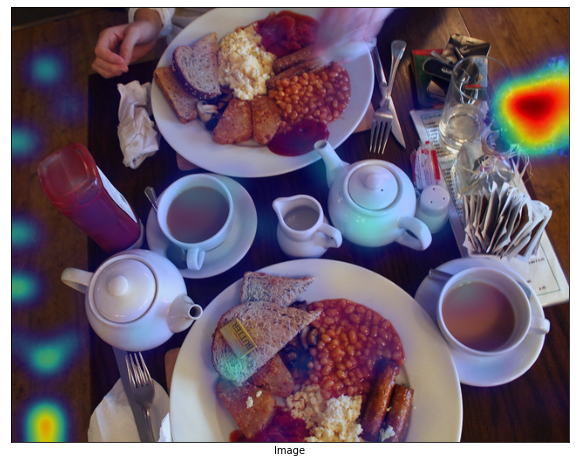

array([[[0.11282713, 0.07897899, 0.08211975],
        [0.10530698, 0.07898023, 0.07082976],
        [0.10154922, 0.07522164, 0.05953184],
        ...,
        [0.32729045, 0.19028513, 0.08380224],
        [0.31969056, 0.18648615, 0.07998074],
        [0.30827871, 0.17507187, 0.06855495]],

       [[0.11282188, 0.07897533, 0.08214084],
        [0.10530204, 0.07897653, 0.0708515 ],
        [0.10530531, 0.07897899, 0.06331529],
        ...,
        [0.32726222, 0.19026874, 0.08383963],
        [0.32346845, 0.18647003, 0.08001859],
        [0.31205758, 0.1750567 , 0.06859385]],

       [[0.1128115 , 0.07896805, 0.08218259],
        [0.10529229, 0.07896923, 0.07089456],
        [0.10529543, 0.07897158, 0.06335958],
        ...,
        [0.33481586, 0.18643156, 0.09152312],
        [0.33102277, 0.18263325, 0.08770326],
        [0.31961396, 0.17122176, 0.07628074]],

       ...,

       [[0.21612981, 0.1113396 , 0.18091401],
        [0.21230176, 0.10778397, 0.1793578 ],
        [0.21445401, 0

In [9]:
visualize(image, gradcam)